In [1]:
from utils import *
import pandas as pd

## Momentum Plot

In [47]:
def make_topk_plot(
    df,
    ks,
    var_x,
    var_y,
    var_color,
    colors=["#443781", "#E7E419"],
    linestyles=["-", "--"],
    figsize=(5, 3),
    label_template="{}, Top {}",
):
    fig, ax = plt.subplots(figsize=figsize)

    dfks = [
        get_topk_results(df, top_variable="base_lr", other_variables=[var_x, var_color], k=k)
        for k in ks
    ]
    lines = []
    for idx, value_color in enumerate(dfks[0][var_color].unique()):
        for dfk, k, linestyle in zip(dfks, ks, linestyles):
            df_color = dfk[dfk[var_color] == value_color]
            # for idx, (value_color, df_color) in enumerate(dfk.groupby(var_color)):
            color = colors[idx]
            line = ax.errorbar(
                df_color[var_x],
                df_color[f"{var_y}_mean"],
                yerr=df_color[f"{var_y}_std"],
                capsize=2,
                color=color,
                label=label_template.format(value_color, k),
                linestyle=linestyle,
            )
            lines.append({"k": k, var_color:value_color, "line": line})
    return fig, ax, lines

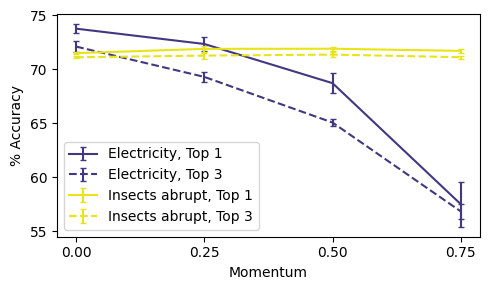

In [49]:
df = pd.read_csv("../reports/momentum/v3.csv.zip")
df["accuracy"] *= 100
dfp = df[
    (df["n_hidden_layers"] == 1)
    & (df["nesterov"] == False)
    & (df["batch_size"] == 4)
    & (df["dataset"].isin(["Insects abrupt", "Electricity"]))
]
fig, ax, lines = make_topk_plot(dfp, [1, 3], "momentum", "accuracy", "dataset")
ax.legend(loc='lower left')
ax.set_xticks(dfp["momentum"].unique())
ax.set_ylabel("% Accuracy")
ax.set_xlabel("Momentum")
plt.tight_layout()
plt.savefig("../pub/figures/momentum_datasets.pdf")

/tmp/ipykernel_2768368/1779100517.py:7: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  line["line"].set_label(f"Top {line['k']} LRs" + ", Nesterov" * line["nesterov"])


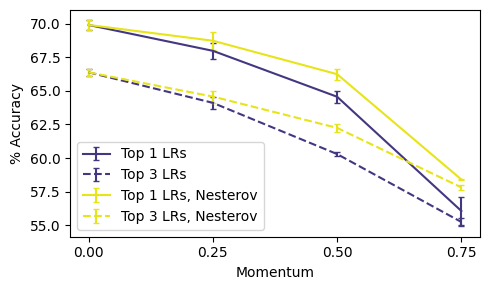

In [50]:
dfp = df[(df["n_hidden_layers"] == 1) & (df["dataset"] == "Electricity")]
dfpn = dfp[dfp.momentum == 0].copy()
dfpn["nesterov"] = True
dfp = pd.concat([dfp, dfpn])
fig, ax, lines = make_topk_plot(dfp, [1, 3], "momentum", "accuracy", "nesterov")
for line in lines:
    line["line"].set_label(f"Top {line['k']} LRs" + ", Nesterov" * line["nesterov"])
ax.set_xticks(dfp["momentum"].unique())
ax.legend(loc="lower left")
ax.set_ylabel("% Accuracy")
ax.set_xlabel("Momentum")
plt.tight_layout()
plt.savefig("../pub/figures/momentum_nesterov.pdf")

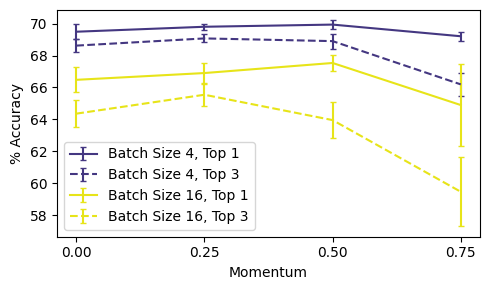

In [51]:
dfp = df[(df["nesterov"] == False) & (df["dataset"] == "Insects abrupt")]
fig, ax, lines = make_topk_plot(
    dfp,
    [1, 3],
    "momentum",
    "accuracy",
    "batch_size",
    label_template="Batch Size {}, Top {}",
)
ax.set_xticks(dfp["momentum"].unique())
ax.legend(loc="lower left")
ax.set_ylabel("% Accuracy")
ax.set_xlabel("Momentum")
plt.tight_layout()
plt.savefig("../pub/figures/momentum_batchsize.pdf")

### Weight decay with best LRs vs. datasets

In [53]:
df = pd.read_csv("../reports/weight_decay/v3.csv.zip")
df["accuracy"] *= 100

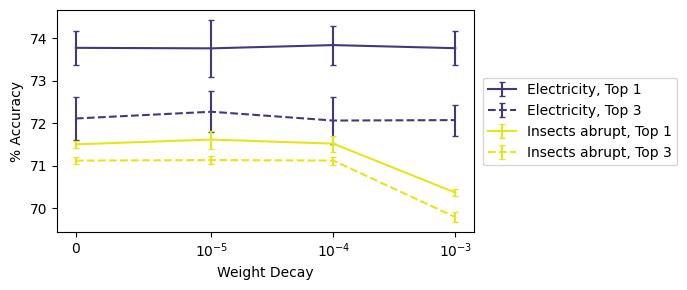

In [58]:
dfp = df[
    (df["n_hidden_layers"] == 1)
    & (df["batch_size"] == 4)
    & (df["dataset"].isin(["Insects abrupt", "Electricity"]))
]
fig, ax, lines = make_topk_plot(dfp, [1, 3], "weight_decay", "accuracy", "dataset", figsize=(7, 3))
# Create the legend
ax.set_xscale("symlog", linthresh=1e-5)
ax.set_xticks(dfp["weight_decay"].unique())
ax.legend(loc=(1.02, 0.3))
ax.set_ylabel("% Accuracy")
ax.set_xlabel("Weight Decay")
ax.minorticks_off()
plt.tight_layout()
plt.savefig("../pub/figures/weight_decay_datasets.pdf")

/tmp/ipykernel_2768368/576688801.py:7: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  line["line"].set_label(f"Top {line['k']} LRs, {nl} hidden layer" + "s" * (nl > 1))


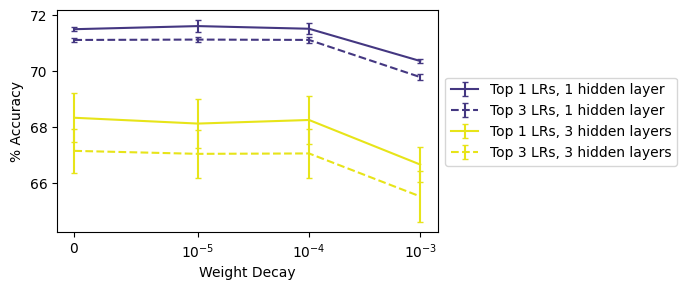

In [59]:
dfp = df[(df["batch_size"] == 4) & (df["dataset"] == "Insects abrupt")]
fig, ax, lines = make_topk_plot(
    dfp, [1, 3], "weight_decay", "accuracy", "n_hidden_layers", figsize=(7, 3)
)
for line in lines:
    nl = line["n_hidden_layers"]
    line["line"].set_label(f"Top {line['k']} LRs, {nl} hidden layer" + "s" * (nl > 1))
# Create the legend
ax.set_xscale("symlog", linthresh=1e-5)
ax.set_xticks(dfp["weight_decay"].unique())
ax.legend(loc=(1.02, 0.3))
ax.set_ylabel("% Accuracy")
ax.set_xlabel("Weight Decay")
ax.minorticks_off()
plt.tight_layout()
plt.savefig("../pub/figures/weight_decay_hidden_layers.pdf")